In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#so i can see all the columns
pd.set_option('display.max_columns', None)

In [2]:
#got the table from https://nces.ed.gov/ccd/elsi/tableGenerator.aspx?savedTableID=357854
#need to click a bunch of check boxes and the interface can only handle a few years at a time
#then exported as a csv once it had generated the table I needed
#the csv version of the table brings in lines that the begining that throw everything off so you have to cut the first 6
#there is a footer that isn't necessary, but also doesn't really hurt anything, so I removed it as well (7 lines total)

df=pd.read_csv('../CAPSTONE_DATA/ELSI_csv_export.csv', skiprows= range(0,6),skipfooter=7)

<ipython-input-2-2f659cf8e807>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('../CAPSTONE_DATA/ELSI_csv_export.csv', skiprows= range(0,6),skipfooter=7)


In [3]:
df_dropout=pd.read_csv('../CAPSTONE_DATA/ELSI_csv_export_dropout_rate.csv', skiprows= range(0,6),skipfooter=7)

<ipython-input-3-0fe670f607af>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_dropout=pd.read_csv('../CAPSTONE_DATA/ELSI_csv_export_dropout_rate.csv', skiprows= range(0,6),skipfooter=7)


In [4]:
#merged original df with the one with dropout info and then assigned it back to the original df.
df=df.merge(df_dropout, how='outer', on='Agency ID - NCES Assigned [District] Latest available year')

In [5]:
#replaced all the symbols in the df to 0s so that I can change these columns into intergers since they are currently objects
df=df.replace(['†','–','="0"','‡','="0.90"','="0.70"','="0.50"','="0.00"','="0.40"','="0.60"','="0.80"','="0.10"','="0.20"','="0.30"'],'0')

In [6]:
the_list=df.columns
print(the_list[0:101])

Index(['Agency Name_x', 'State Name [District] Latest available year_x',
       'State Abbr [District] Latest available year',
       'Agency ID - NCES Assigned [District] Latest available year',
       'State Name [District] 2009-10', 'State Name [District] 2008-09',
       'State Name [District] 2007-08', 'State Name [District] 2006-07',
       'State Name [District] 2005-06', 'Agency Name [District] 2009-10',
       ...
       'Diploma Recipients (**) [District] 2009-10',
       'Diploma Recipients (**) [District] 2008-09',
       'Diploma Recipients (**) [District] 2007-08',
       'Diploma Recipients (**) [District] 2006-07',
       'Diploma Recipients (**) [District] 2005-06',
       'Averaged Freshman Graduation Rate [District] 2009-10',
       'Averaged Freshman Graduation Rate [District] 2008-09',
       'Averaged Freshman Graduation Rate [District] 2007-08',
       'Averaged Freshman Graduation Rate [District] 2006-07',
       'Averaged Freshman Graduation Rate [District] 200

use other notebooks to assign these new names to the columns

In [7]:
df.columns=['Agency Name', 'State Name Latest available year_x',
       'State Abbr Latest available year',
       'Agency ID - NCES Assigned Latest available year',
       'State Name 2009-10', 'State Name 2008-09',
       'State Name 2007-08', 'State Name 2006-07',
       'State Name 2005-06', 'Agency Name 2009-10',
       'Agency Name 2008-09', 'Agency Name 2007-08',
       'Agency Name 2006-07', 'Agency Name 2005-06',
       'County Name 2009-10', 'County Name 2008-09',
       'County Name 2007-08', 'County Name 2006-07',
       'County Name 2005-06', 'County Number 2009-10',
       'County Number 2008-09', 'County Number 2007-08',
       'County Number 2006-07', 'County Number 2005-06',
       'Total Number Operational Schools 2009-10',
       'Total Number Operational Schools 2008-09',
       'Total Number Operational Schools 2007-08',
       'Total Number Operational Schools 2006-07',
       'Total Number Operational Schools 2005-06',
       'Location ZIP 2009-10', 'Location ZIP 2008-09',
       'Location ZIP 2007-08', 'Location ZIP 2006-07',
       'Location ZIP 2005-06',
       'Grades 9-12 Students 2009-10',
       'Grades 9-12 Students 2008-09',
       'Grades 9-12 Students 2007-08',
       'Grades 9-12 Students 2006-07',
       'Grades 9-12 Students 2005-06',
       'Fall Membership 2009-10',
       'Fall Membership 2008-09',
       'Fall Membership 2007-08',
       'Fall Membership 2006-07',
       'Fall Membership 2005-06',
       'Total General Revenue 2009-10',
       'Total General Revenue 2008-09',
       'Total General Revenue 2007-08',
       'Total General Revenue 2006-07',
       'Total General Revenue 2005-06',
       'Total Current Expenditures - El-Sec Education 2009-10',
       'Total Current Expenditures - El-Sec Education 2008-09',
       'Total Current Expenditures - El-Sec Education 2007-08',
       'Total Current Expenditures - El-Sec Education 2006-07',
       'Total Current Expenditures - El-Sec Education 2005-06',
       'Total Expenditures 2009-10',
       'Total Expenditures 2008-09',
       'Total Expenditures 2007-08',
       'Total Expenditures 2006-07',
       'Total Expenditures 2005-06',
       'Total Revenue per Pupil 2009-10',
       'Total Revenue per Pupil 2008-09',
       'Total Revenue per Pupil 2007-08',
       'Total Revenue per Pupil 2006-07',
       'Total Revenue per Pupil 2005-06',
       'Total Current Expenditures - Instruction per Pupil 2009-10',
       'Total Current Expenditures - Instruction per Pupil 2008-09',
       'Total Current Expenditures - Instruction per Pupil 2007-08',
       'Total Current Expenditures - Instruction per Pupil 2006-07',
       'Total Current Expenditures - Instruction per Pupil 2005-06',
       'Total Expenditures per Pupil 2009-10',
       'Total Expenditures per Pupil 2008-09',
       'Total Expenditures per Pupil 2007-08',
       'Total Expenditures per Pupil 2006-07',
       'Total Expenditures per Pupil 2005-06',
       'Total Students All Grades 2009-10',
       'Total Students All Grades 2008-09',
       'Total Students All Grades 2007-08',
       'Total Students All Grades 2006-07',
       'Total Students All Grades 2005-06',
       'Location City 2009-10', 'Location City 2008-09',
       'Location City 2007-08', 'Location City 2006-07',
       'Location City 2005-06', 'Agency Name_y',
       'State Name Latest available year_y',
       'Total Dropout Rate - 9-12th grade 2009-10',
       'Total Dropout Rate - 9-12th grade 2008-09',
       'Total Dropout Rate - 9-12th grade 2007-08',
       'Total Dropout Rate - 9-12th grade 2006-07',
       'Total Dropout Rate - 9-12th grade 2005-06',
       'Diploma Recipients 2009-10',
       'Diploma Recipients 2008-09',
       'Diploma Recipients 2007-08',
       'Diploma Recipients 2006-07',
       'Diploma Recipients 2005-06',
       'Averaged Freshman Graduation Rate 2009-10',
       'Averaged Freshman Graduation Rate 2008-09',
       'Averaged Freshman Graduation Rate 2007-08',
       'Averaged Freshman Graduation Rate 2006-07',
       'Averaged Freshman Graduation Rate 2005-06']

In [8]:
#changing the columns below into intergers from objects so that calculations and visualizations can be done. 
df[[  'Total Number Operational Schools 2009-10',
   'Total Number Operational Schools 2008-09',
   'Total Number Operational Schools 2007-08',
   'Total Number Operational Schools 2006-07',
   'Total Number Operational Schools 2005-06',
   'Grades 9-12 Students 2009-10',
   'Grades 9-12 Students 2008-09',
   'Grades 9-12 Students 2007-08',
   'Grades 9-12 Students 2006-07',
   'Grades 9-12 Students 2005-06',
   'Fall Membership 2009-10',
   'Fall Membership 2008-09',
   'Fall Membership 2007-08',
   'Fall Membership 2006-07',
   'Fall Membership 2005-06',
   'Total General Revenue 2009-10',
   'Total General Revenue 2008-09',
   'Total General Revenue 2007-08',
   'Total General Revenue 2006-07',
   'Total General Revenue 2005-06',
   'Total Current Expenditures - El-Sec Education 2009-10',
   'Total Current Expenditures - El-Sec Education 2008-09',
   'Total Current Expenditures - El-Sec Education 2007-08',
   'Total Current Expenditures - El-Sec Education 2006-07',
   'Total Current Expenditures - El-Sec Education 2005-06',
   'Total Expenditures 2009-10',
   'Total Expenditures 2008-09',
   'Total Expenditures 2007-08',
   'Total Expenditures 2006-07',
   'Total Expenditures 2005-06',
   'Total Revenue per Pupil 2009-10',
   'Total Revenue per Pupil 2008-09',
   'Total Revenue per Pupil 2007-08',
   'Total Revenue per Pupil 2006-07',
   'Total Revenue per Pupil 2005-06',
   'Total Current Expenditures - Instruction per Pupil 2009-10',
   'Total Current Expenditures - Instruction per Pupil 2008-09',
   'Total Current Expenditures - Instruction per Pupil 2007-08',
   'Total Current Expenditures - Instruction per Pupil 2006-07',
   'Total Current Expenditures - Instruction per Pupil 2005-06',
   'Total Expenditures per Pupil 2009-10',
   'Total Expenditures per Pupil 2008-09',
   'Total Expenditures per Pupil 2007-08',
   'Total Expenditures per Pupil 2006-07',
   'Total Expenditures per Pupil 2005-06',
   'Total Students All Grades 2009-10',
   'Total Students All Grades 2008-09',
   'Total Students All Grades 2007-08',
   'Total Students All Grades 2006-07',
   'Total Students All Grades 2005-06'
  ]]=df[[  'Total Number Operational Schools 2009-10',
   'Total Number Operational Schools 2008-09',
   'Total Number Operational Schools 2007-08',
   'Total Number Operational Schools 2006-07',
   'Total Number Operational Schools 2005-06',
   'Grades 9-12 Students 2009-10',
   'Grades 9-12 Students 2008-09',
   'Grades 9-12 Students 2007-08',
   'Grades 9-12 Students 2006-07',
   'Grades 9-12 Students 2005-06',
   'Fall Membership 2009-10',
   'Fall Membership 2008-09',
   'Fall Membership 2007-08',
   'Fall Membership 2006-07',
   'Fall Membership 2005-06',
   'Total General Revenue 2009-10',
   'Total General Revenue 2008-09',
   'Total General Revenue 2007-08',
   'Total General Revenue 2006-07',
   'Total General Revenue 2005-06',
   'Total Current Expenditures - El-Sec Education 2009-10',
   'Total Current Expenditures - El-Sec Education 2008-09',
   'Total Current Expenditures - El-Sec Education 2007-08',
   'Total Current Expenditures - El-Sec Education 2006-07',
   'Total Current Expenditures - El-Sec Education 2005-06',
   'Total Expenditures 2009-10',
   'Total Expenditures 2008-09',
   'Total Expenditures 2007-08',
   'Total Expenditures 2006-07',
   'Total Expenditures 2005-06',
   'Total Revenue per Pupil 2009-10',
   'Total Revenue per Pupil 2008-09',
   'Total Revenue per Pupil 2007-08',
   'Total Revenue per Pupil 2006-07',
   'Total Revenue per Pupil 2005-06',
   'Total Current Expenditures - Instruction per Pupil 2009-10',
   'Total Current Expenditures - Instruction per Pupil 2008-09',
   'Total Current Expenditures - Instruction per Pupil 2007-08',
   'Total Current Expenditures - Instruction per Pupil 2006-07',
   'Total Current Expenditures - Instruction per Pupil 2005-06',
   'Total Expenditures per Pupil 2009-10',
   'Total Expenditures per Pupil 2008-09',
   'Total Expenditures per Pupil 2007-08',
   'Total Expenditures per Pupil 2006-07',
   'Total Expenditures per Pupil 2005-06',
   'Total Students All Grades 2009-10',
   'Total Students All Grades 2008-09',
   'Total Students All Grades 2007-08',
   'Total Students All Grades 2006-07',
   'Total Students All Grades 2005-06'
  ]].astype('float')

In [9]:
df[['Total Dropout Rate - 9-12th grade 2009-10',
   'Total Dropout Rate - 9-12th grade 2008-09',
   'Total Dropout Rate - 9-12th grade 2007-08',
   'Total Dropout Rate - 9-12th grade 2006-07',
   'Total Dropout Rate - 9-12th grade 2005-06',
   'Diploma Recipients 2009-10',
   'Diploma Recipients 2008-09',
   'Diploma Recipients 2007-08',
   'Diploma Recipients 2006-07',
   'Diploma Recipients 2005-06',
   'Averaged Freshman Graduation Rate 2009-10',
   'Averaged Freshman Graduation Rate 2008-09',
   'Averaged Freshman Graduation Rate 2007-08',
   'Averaged Freshman Graduation Rate 2006-07',
   'Averaged Freshman Graduation Rate 2005-06']]=df[[
   'Total Dropout Rate - 9-12th grade 2009-10',
   'Total Dropout Rate - 9-12th grade 2008-09',
   'Total Dropout Rate - 9-12th grade 2007-08',
   'Total Dropout Rate - 9-12th grade 2006-07',
   'Total Dropout Rate - 9-12th grade 2005-06',
   'Diploma Recipients 2009-10',
   'Diploma Recipients 2008-09',
   'Diploma Recipients 2007-08',
   'Diploma Recipients 2006-07',
   'Diploma Recipients 2005-06',
   'Averaged Freshman Graduation Rate 2009-10',
   'Averaged Freshman Graduation Rate 2008-09',
   'Averaged Freshman Graduation Rate 2007-08',
   'Averaged Freshman Graduation Rate 2006-07',
   'Averaged Freshman Graduation Rate 2005-06']].astype('float')

In [10]:
df_lean= df[['Agency Name','County Number 2008-09','Total Dropout Rate - 9-12th grade 2009-10',
   'Total Dropout Rate - 9-12th grade 2008-09',
   'Total Dropout Rate - 9-12th grade 2007-08',
   'Total Dropout Rate - 9-12th grade 2006-07',
   'Total Dropout Rate - 9-12th grade 2005-06',
   'Diploma Recipients 2009-10',
   'Diploma Recipients 2008-09',
   'Diploma Recipients 2007-08',
   'Diploma Recipients 2006-07',
   'Diploma Recipients 2005-06',
   'Averaged Freshman Graduation Rate 2009-10',
   'Averaged Freshman Graduation Rate 2008-09',
   'Averaged Freshman Graduation Rate 2007-08',
   'Averaged Freshman Graduation Rate 2006-07',
   'Averaged Freshman Graduation Rate 2005-06',
   'Total Revenue per Pupil 2009-10',
   'Total Revenue per Pupil 2008-09',
   'Total Revenue per Pupil 2007-08',
   'Total Revenue per Pupil 2006-07',
   'Total Revenue per Pupil 2005-06']]
df_lean

,Agency Name,County Number 2008-09,Total Dropout Rate - 9-12th grade 2009-10,Total Dropout Rate - 9-12th grade 2008-09,Total Dropout Rate - 9-12th grade 2007-08,Total Dropout Rate - 9-12th grade 2006-07,Total Dropout Rate - 9-12th grade 2005-06,Diploma Recipients 2009-10,Diploma Recipients 2008-09,Diploma Recipients 2007-08,Diploma Recipients 2006-07,Diploma Recipients 2005-06,Averaged Freshman Graduation Rate 2009-10,Averaged Freshman Graduation Rate 2008-09,Averaged Freshman Graduation Rate 2007-08,Averaged Freshman Graduation Rate 2006-07,Averaged Freshman Graduation Rate 2005-06,Total Revenue per Pupil 2009-10,Total Revenue per Pupil 2008-09,Total Revenue per Pupil 2007-08,Total Revenue per Pupil 2006-07,Total Revenue per Pupil 2005-06
0,(ILC) ATOKA-COAL COUNTIES ...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,(ILC) CHEROKEE COUNTY ...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,(ILC) CHOCTAW NATION ...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(ILC) FIVE-STAR ...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,(ILC) GARFIELD COUNTY ...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18953,ZOE LEARNING ACADEMY,48201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9042.0,8887.0,8756.0,7290.0,7814.0
18954,ZUMBRO EDUCATION DISTRICT,27109,4.5,9.9,18.2,44.7,29.8,19.0,16.0,22.0,22.0,17.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0
18955,ZUMBROTA-MAZEPPA SCHOOL DISTRICT,27049,0.0,0.0,0.0,0.0,0.0,75.0,77.0,95.0,100.0,102.0,86.2,95.1,96.0,90.1,96.8,10451.0,10724.0,9773.0,9779.0,8929.0
18956,ZUNI PUBLIC SCHOOLS,35031,5.3,3.4,3.0,4.6,4.3,97.0,133.0,101.0,82.0,83.0,65.1,70.4,66.4,65.1,67.7,14304.0,13942.0,15197.0,13979.0,14150.0


In [11]:
#using describe to get aggregate data on data set
#I don't think this reflects the facts because there are alot of zeroes
df_lean = df_lean.replace(0, np.NaN)
df_lean.describe()

,Total Dropout Rate - 9-12th grade 2009-10,Total Dropout Rate - 9-12th grade 2008-09,Total Dropout Rate - 9-12th grade 2007-08,Total Dropout Rate - 9-12th grade 2006-07,Total Dropout Rate - 9-12th grade 2005-06,Diploma Recipients 2009-10,Diploma Recipients 2008-09,Diploma Recipients 2007-08,Diploma Recipients 2006-07,Diploma Recipients 2005-06,Averaged Freshman Graduation Rate 2009-10,Averaged Freshman Graduation Rate 2008-09,Averaged Freshman Graduation Rate 2007-08,Averaged Freshman Graduation Rate 2006-07,Averaged Freshman Graduation Rate 2005-06,Total Revenue per Pupil 2009-10,Total Revenue per Pupil 2008-09,Total Revenue per Pupil 2007-08,Total Revenue per Pupil 2006-07,Total Revenue per Pupil 2005-06
count,2240.000000,6590.000000,7298.000000,7419.000000,7118.000000,11723.000000,11283.000000,11648.000000,11806.000000,10756.000000,10785.000000,10412.000000,10714.000000,10877.000000,9820.000000,15449.000000,15486.000000,15367.000000,15334.000000,15441.000000
mean,11.997812,5.404173,5.718717,7.079728,5.296600,263.515226,233.780821,251.558293,242.173048,231.311919,82.694279,81.711650,81.138454,80.689997,80.154501,13618.912163,13553.738473,13190.096180,12570.679210,11844.812771
std,13.850252,7.938336,9.016960,10.180719,8.118048,761.993599,619.134899,693.946241,647.652736,650.877047,13.743697,13.816087,14.620150,14.764631,15.152341,11589.198765,9504.755755,9006.300425,8293.791602,7734.750732
min,4.100000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.200000,1.000000,2.500000,1.200000,26.000000,114.000000,5.000000,5.000000,276.000000
25%,4.900000,2.000000,2.100000,2.600000,2.000000,40.000000,38.000000,39.000000,39.000000,36.000000,75.000000,73.700000,73.025000,72.100000,71.600000,9702.000000,9655.000000,9439.000000,9031.000000,8568.000000
50%,6.200000,3.200000,3.300000,4.300000,3.150000,95.000000,93.000000,94.000000,94.000000,86.000000,84.500000,83.300000,83.000000,82.600000,82.000000,11574.000000,11423.000000,11065.000000,10574.500000,10017.000000
75%,11.100000,5.500000,5.400000,7.000000,5.200000,229.000000,217.000000,226.000000,222.000000,205.000000,93.000000,92.000000,92.000000,91.800000,91.300000,14880.000000,14774.250000,14264.500000,13656.750000,12804.000000
max,95.300000,90.700000,97.800000,98.800000,91.700000,35457.000000,20082.000000,30580.000000,27004.000000,28322.000000,100.000000,100.000000,100.000000,100.000000,100.000000,771000.000000,400455.000000,263694.000000,266125.000000,177712.000000


In [12]:
#using describe to get aggregate data on data set
df_lean = df_lean.replace(0, np.NaN)
df_lean.mean()

Total Dropout Rate - 9-12th grade 2009-10       11.997812
Total Dropout Rate - 9-12th grade 2008-09        5.404173
Total Dropout Rate - 9-12th grade 2007-08        5.718717
Total Dropout Rate - 9-12th grade 2006-07        7.079728
Total Dropout Rate - 9-12th grade 2005-06        5.296600
Diploma Recipients 2009-10                     263.515226
Diploma Recipients 2008-09                     233.780821
Diploma Recipients 2007-08                     251.558293
Diploma Recipients 2006-07                     242.173048
Diploma Recipients 2005-06                     231.311919
Averaged Freshman Graduation Rate 2009-10       82.694279
Averaged Freshman Graduation Rate 2008-09       81.711650
Averaged Freshman Graduation Rate 2007-08       81.138454
Averaged Freshman Graduation Rate 2006-07       80.689997
Averaged Freshman Graduation Rate 2005-06       80.154501
Total Revenue per Pupil 2009-10              13618.912163
Total Revenue per Pupil 2008-09              13553.738473
Total Revenue 

In [13]:
df_lean.loc[18958] = df_lean.mean()
df_lean

,Agency Name,County Number 2008-09,Total Dropout Rate - 9-12th grade 2009-10,Total Dropout Rate - 9-12th grade 2008-09,Total Dropout Rate - 9-12th grade 2007-08,Total Dropout Rate - 9-12th grade 2006-07,Total Dropout Rate - 9-12th grade 2005-06,Diploma Recipients 2009-10,Diploma Recipients 2008-09,Diploma Recipients 2007-08,Diploma Recipients 2006-07,Diploma Recipients 2005-06,Averaged Freshman Graduation Rate 2009-10,Averaged Freshman Graduation Rate 2008-09,Averaged Freshman Graduation Rate 2007-08,Averaged Freshman Graduation Rate 2006-07,Averaged Freshman Graduation Rate 2005-06,Total Revenue per Pupil 2009-10,Total Revenue per Pupil 2008-09,Total Revenue per Pupil 2007-08,Total Revenue per Pupil 2006-07,Total Revenue per Pupil 2005-06
0,(ILC) ATOKA-COAL COUNTIES ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(ILC) CHEROKEE COUNTY ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(ILC) CHOCTAW NATION ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(ILC) FIVE-STAR ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(ILC) GARFIELD COUNTY ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18954,ZUMBRO EDUCATION DISTRICT,27109,4.500000,9.900000,18.200000,44.700000,29.8000,19.000000,16.000000,22.000000,22.000000,17.000000,100.000000,100.00000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN
18955,ZUMBROTA-MAZEPPA SCHOOL DISTRICT,27049,NaN,NaN,NaN,NaN,NaN,75.000000,77.000000,95.000000,100.000000,102.000000,86.200000,95.10000,96.000000,90.100000,96.800000,10451.000000,10724.000000,9773.00000,9779.00000,8929.000000
18956,ZUNI PUBLIC SCHOOLS,35031,5.300000,3.400000,3.000000,4.600000,4.3000,97.000000,133.000000,101.000000,82.000000,83.000000,65.100000,70.40000,66.400000,65.100000,67.700000,14304.000000,13942.000000,15197.00000,13979.00000,14150.000000
18957,ZURICH ELEM,30005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11438.000000,9098.000000,8738.00000,8349.00000,8268.000000


In [14]:
##replacing the Nan value in for 'Agency Name' in the mean column with 'National Average', this allows it to be recognized 
#when I call for 'Agency Name' in future dfs and tables
df_lean['Agency Name']= df_lean['Agency Name'].fillna("National Average")

In [15]:
df_lean

,Agency Name,County Number 2008-09,Total Dropout Rate - 9-12th grade 2009-10,Total Dropout Rate - 9-12th grade 2008-09,Total Dropout Rate - 9-12th grade 2007-08,Total Dropout Rate - 9-12th grade 2006-07,Total Dropout Rate - 9-12th grade 2005-06,Diploma Recipients 2009-10,Diploma Recipients 2008-09,Diploma Recipients 2007-08,Diploma Recipients 2006-07,Diploma Recipients 2005-06,Averaged Freshman Graduation Rate 2009-10,Averaged Freshman Graduation Rate 2008-09,Averaged Freshman Graduation Rate 2007-08,Averaged Freshman Graduation Rate 2006-07,Averaged Freshman Graduation Rate 2005-06,Total Revenue per Pupil 2009-10,Total Revenue per Pupil 2008-09,Total Revenue per Pupil 2007-08,Total Revenue per Pupil 2006-07,Total Revenue per Pupil 2005-06
0,(ILC) ATOKA-COAL COUNTIES ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(ILC) CHEROKEE COUNTY ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(ILC) CHOCTAW NATION ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(ILC) FIVE-STAR ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(ILC) GARFIELD COUNTY ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18954,ZUMBRO EDUCATION DISTRICT,27109,4.500000,9.900000,18.200000,44.700000,29.8000,19.000000,16.000000,22.000000,22.000000,17.000000,100.000000,100.00000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN
18955,ZUMBROTA-MAZEPPA SCHOOL DISTRICT,27049,NaN,NaN,NaN,NaN,NaN,75.000000,77.000000,95.000000,100.000000,102.000000,86.200000,95.10000,96.000000,90.100000,96.800000,10451.000000,10724.000000,9773.00000,9779.00000,8929.000000
18956,ZUNI PUBLIC SCHOOLS,35031,5.300000,3.400000,3.000000,4.600000,4.3000,97.000000,133.000000,101.000000,82.000000,83.000000,65.100000,70.40000,66.400000,65.100000,67.700000,14304.000000,13942.000000,15197.00000,13979.00000,14150.000000
18957,ZURICH ELEM,30005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11438.000000,9098.000000,8738.00000,8349.00000,8268.000000


In [16]:
#df of the mean
National_avg=df_lean.loc[[18958]]

In [17]:
National_avg.columns

Index(['Agency Name', 'County Number 2008-09',
       'Total Dropout Rate - 9-12th grade 2009-10',
       'Total Dropout Rate - 9-12th grade 2008-09',
       'Total Dropout Rate - 9-12th grade 2007-08',
       'Total Dropout Rate - 9-12th grade 2006-07',
       'Total Dropout Rate - 9-12th grade 2005-06',
       'Diploma Recipients 2009-10', 'Diploma Recipients 2008-09',
       'Diploma Recipients 2007-08', 'Diploma Recipients 2006-07',
       'Diploma Recipients 2005-06',
       'Averaged Freshman Graduation Rate 2009-10',
       'Averaged Freshman Graduation Rate 2008-09',
       'Averaged Freshman Graduation Rate 2007-08',
       'Averaged Freshman Graduation Rate 2006-07',
       'Averaged Freshman Graduation Rate 2005-06',
       'Total Revenue per Pupil 2009-10', 'Total Revenue per Pupil 2008-09',
       'Total Revenue per Pupil 2007-08', 'Total Revenue per Pupil 2006-07',
       'Total Revenue per Pupil 2005-06'],
      dtype='object')

In [18]:
National_avg_tot_rev_per_kid=National_avg[['Agency Name','Total Revenue per Pupil 2009-10', 'Total Revenue per Pupil 2008-09',
       'Total Revenue per Pupil 2007-08', 'Total Revenue per Pupil 2006-07',
       'Total Revenue per Pupil 2005-06']]
National_avg_tot_rev_per_kid

,Agency Name,Total Revenue per Pupil 2009-10,Total Revenue per Pupil 2008-09,Total Revenue per Pupil 2007-08,Total Revenue per Pupil 2006-07,Total Revenue per Pupil 2005-06
18958,National Average,13618.912163,13553.738473,13190.09618,12570.67921,11844.812771


In [19]:
#Another way like the one above, but it seems to have fewer issues after the fact
##replacing the Nan value in for 'Agency Name' in the mean column with 'National Average', this allows it to be recognized 
#when I call for 'Agency Name' in future dfs and tables
National_avg_tot_rev_per_kid['Agency Name'] = ({"Agency Name":[np.nan,"National Average"]})

<ipython-input-19-682a1e6000a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  National_avg_tot_rev_per_kid['Agency Name'] = ({"Agency Name":[np.nan,"National Average"]})


In [20]:
National_avg_tot_rev_per_kid

,Agency Name,Total Revenue per Pupil 2009-10,Total Revenue per Pupil 2008-09,Total Revenue per Pupil 2007-08,Total Revenue per Pupil 2006-07,Total Revenue per Pupil 2005-06
18958,Agency Name,13618.912163,13553.738473,13190.09618,12570.67921,11844.812771


In [21]:
 
rev_per_kid_09_to_10=National_avg_tot_rev_per_kid[['Agency Name','Total Revenue per Pupil 2009-10']]

In [22]:
rev_per_kid_09_to_10=rev_per_kid_09_to_10.sort_values('Total Revenue per Pupil 2009-10')

In [23]:
y_rev_per_kid_09_to_10=rev_per_kid_09_to_10['Total Revenue per Pupil 2009-10']

In [24]:
x=rev_per_kid_09_to_10['Agency Name']

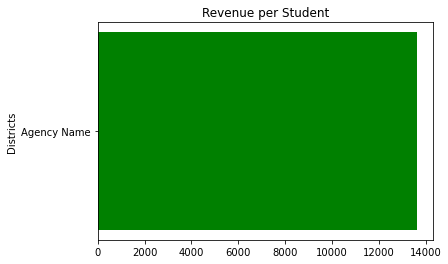

In [25]:
y_rev_per_kid_09_to_10= y_rev_per_kid_09_to_10
a = [x, y_rev_per_kid_09_to_10]
y_pos = np.arange(len(a[1]))
labels = np.arange(1,11,1)
objects = a[1]
rev_per_kid_09_to_10_plot= plt.barh(a[0], a[1], align='center', alpha=1,color=['green', 'blue', 'blue', 'blue', 'blue'])
#plt.xticks(y_pos, a[1])
plt.ylabel('Districts')
plt.title('Revenue per Student')
plt.show(rev_per_kid_09_to_10_plot)

Planning on getting at least 3 schools that are year round and comparing their dropout rate and freshman grad rate with the average of those districts that surround them.  Will do the same with the cost per student and pay look at current and longterm cost as well.  Would Ideally be able to automate so that I don't have to look on a map for each school.  If I can then I could scale up to more year round schools for a more comprehensive look.  Ideally would like to automate determining schools that are year round from those that aren't so that can be scaled easily too.

Would also be nice to look at the before and after for 5 years for schools that made the transition from normal to year round. A look at schools that went the other way would be nice as well.

These two methods would allow me to compare places against themselves and against others

In [26]:
df_lean

,Agency Name,County Number 2008-09,Total Dropout Rate - 9-12th grade 2009-10,Total Dropout Rate - 9-12th grade 2008-09,Total Dropout Rate - 9-12th grade 2007-08,Total Dropout Rate - 9-12th grade 2006-07,Total Dropout Rate - 9-12th grade 2005-06,Diploma Recipients 2009-10,Diploma Recipients 2008-09,Diploma Recipients 2007-08,Diploma Recipients 2006-07,Diploma Recipients 2005-06,Averaged Freshman Graduation Rate 2009-10,Averaged Freshman Graduation Rate 2008-09,Averaged Freshman Graduation Rate 2007-08,Averaged Freshman Graduation Rate 2006-07,Averaged Freshman Graduation Rate 2005-06,Total Revenue per Pupil 2009-10,Total Revenue per Pupil 2008-09,Total Revenue per Pupil 2007-08,Total Revenue per Pupil 2006-07,Total Revenue per Pupil 2005-06
0,(ILC) ATOKA-COAL COUNTIES ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(ILC) CHEROKEE COUNTY ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(ILC) CHOCTAW NATION ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(ILC) FIVE-STAR ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(ILC) GARFIELD COUNTY ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18954,ZUMBRO EDUCATION DISTRICT,27109,4.500000,9.900000,18.200000,44.700000,29.8000,19.000000,16.000000,22.000000,22.000000,17.000000,100.000000,100.00000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN
18955,ZUMBROTA-MAZEPPA SCHOOL DISTRICT,27049,NaN,NaN,NaN,NaN,NaN,75.000000,77.000000,95.000000,100.000000,102.000000,86.200000,95.10000,96.000000,90.100000,96.800000,10451.000000,10724.000000,9773.00000,9779.00000,8929.000000
18956,ZUNI PUBLIC SCHOOLS,35031,5.300000,3.400000,3.000000,4.600000,4.3000,97.000000,133.000000,101.000000,82.000000,83.000000,65.100000,70.40000,66.400000,65.100000,67.700000,14304.000000,13942.000000,15197.00000,13979.00000,14150.000000
18957,ZURICH ELEM,30005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11438.000000,9098.000000,8738.00000,8349.00000,8268.000000


In [27]:
#pulling out the schools that are surrounding socorro, the school i'm interested in, district number is more helpful than city here
# also resetting the index 

socorro_df=df_lean[(df_lean['County Number 2008-09']=='48141') | (df_lean['Agency Name']=='National Average')].reset_index(drop=True)
socorro_df

,Agency Name,County Number 2008-09,Total Dropout Rate - 9-12th grade 2009-10,Total Dropout Rate - 9-12th grade 2008-09,Total Dropout Rate - 9-12th grade 2007-08,Total Dropout Rate - 9-12th grade 2006-07,Total Dropout Rate - 9-12th grade 2005-06,Diploma Recipients 2009-10,Diploma Recipients 2008-09,Diploma Recipients 2007-08,Diploma Recipients 2006-07,Diploma Recipients 2005-06,Averaged Freshman Graduation Rate 2009-10,Averaged Freshman Graduation Rate 2008-09,Averaged Freshman Graduation Rate 2007-08,Averaged Freshman Graduation Rate 2006-07,Averaged Freshman Graduation Rate 2005-06,Total Revenue per Pupil 2009-10,Total Revenue per Pupil 2008-09,Total Revenue per Pupil 2007-08,Total Revenue per Pupil 2006-07,Total Revenue per Pupil 2005-06
0,ANTHONY ISD,48141,NaN,NaN,NaN,6.300000,2.1000,49.000000,38.000000,48.000000,33.000000,38.000000,77.800000,56.70000,80.000000,52.400000,76.500000,11433.000000,11460.000000,10862.00000,10172.00000,9733.000000
1,BURNHAM WOOD CHARTER SCHOOL DISTRICT,48141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9216.000000,8753.000000,8053.00000,10018.00000,7375.000000
2,CANUTILLO ISD,48141,5.100000,7.800000,5.400000,9.000000,6.2000,351.000000,300.000000,278.000000,211.000000,227.000000,79.400000,69.90000,73.500000,58.000000,65.500000,10576.000000,10373.000000,10285.00000,10052.00000,9701.000000
3,CLINT ISD,48141,4.300000,5.800000,4.700000,4.800000,3.9000,626.000000,545.000000,519.000000,463.000000,446.000000,83.000000,79.00000,75.400000,71.300000,73.000000,9746.000000,9492.000000,9829.00000,9171.00000,8357.000000
4,EL PASO ACADEMY,48141,22.200000,19.500000,29.200000,35.300000,27.1000,123.000000,144.000000,69.000000,94.000000,130.000000,NaN,NaN,NaN,NaN,NaN,8842.000000,8987.000000,8235.00000,7388.00000,6699.000000
5,EL PASO ISD,48141,NaN,4.800000,4.800000,5.300000,3.9000,3857.000000,3396.000000,3481.000000,3251.000000,3328.000000,75.300000,66.00000,66.500000,65.000000,68.800000,10196.000000,9746.000000,9399.00000,8968.00000,8456.000000
6,EL PASO SCHOOL OF EXCELLENCE,48141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,NaN,NaN,NaN,13.900000,17.900000,4461.000000,8266.000000,1120.00000,7787.00000,8526.000000
7,FABENS ISD,48141,NaN,3.000000,3.600000,3.000000,2.6000,154.000000,133.000000,157.000000,106.000000,156.000000,74.400000,70.40000,66.800000,53.000000,69.100000,11700.000000,10737.000000,10206.00000,10388.00000,9713.000000
8,HARMONY SCIENCE ACAD (EL PASO),48141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8863.000000,9187.000000,9903.00000,9602.00000,NaN
9,LA FE PREPARATORY SCHOOL,48141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14410.000000,11817.000000,10872.00000,NaN,NaN


In [28]:
# only the school districts directly surrounding socorro and socorro itself
strpk_lean=socorro_df.drop([0,1,2,4,6,7,8,9,10,13,14,15,16])
strpk_lean

,Agency Name,County Number 2008-09,Total Dropout Rate - 9-12th grade 2009-10,Total Dropout Rate - 9-12th grade 2008-09,Total Dropout Rate - 9-12th grade 2007-08,Total Dropout Rate - 9-12th grade 2006-07,Total Dropout Rate - 9-12th grade 2005-06,Diploma Recipients 2009-10,Diploma Recipients 2008-09,Diploma Recipients 2007-08,Diploma Recipients 2006-07,Diploma Recipients 2005-06,Averaged Freshman Graduation Rate 2009-10,Averaged Freshman Graduation Rate 2008-09,Averaged Freshman Graduation Rate 2007-08,Averaged Freshman Graduation Rate 2006-07,Averaged Freshman Graduation Rate 2005-06,Total Revenue per Pupil 2009-10,Total Revenue per Pupil 2008-09,Total Revenue per Pupil 2007-08,Total Revenue per Pupil 2006-07,Total Revenue per Pupil 2005-06
3,CLINT ISD,48141,4.300000,5.800000,4.700000,4.800000,3.9000,626.000000,545.000000,519.000000,463.000000,446.000000,83.000000,79.00000,75.400000,71.300000,73.000000,9746.000000,9492.000000,9829.00000,9171.00000,8357.000000
5,EL PASO ISD,48141,NaN,4.800000,4.800000,5.300000,3.9000,3857.000000,3396.000000,3481.000000,3251.000000,3328.000000,75.300000,66.00000,66.500000,65.000000,68.800000,10196.000000,9746.000000,9399.00000,8968.00000,8456.000000
11,SAN ELIZARIO ISD,48141,NaN,2.500000,2.500000,4.300000,4.6000,227.000000,214.000000,166.000000,170.000000,169.000000,77.700000,74.00000,61.700000,58.200000,54.600000,10956.000000,9962.000000,9707.00000,9658.00000,9391.000000
12,SOCORRO ISD,48141,NaN,2.000000,2.100000,2.100000,2.5000,2671.000000,2336.000000,2136.000000,1865.000000,1754.000000,81.300000,77.70000,77.300000,74.300000,71.500000,9190.000000,8691.000000,8952.00000,9150.00000,8639.000000
17,YSLETA ISD,48141,NaN,4.000000,3.400000,5.200000,4.8000,3075.000000,2915.000000,2817.000000,2652.000000,2710.000000,82.300000,77.90000,76.600000,73.300000,72.600000,10588.000000,9457.000000,9401.00000,8112.00000,8202.000000
18,National Average,NaN,11.997812,5.404173,5.718717,7.079728,5.2966,263.515226,233.780821,251.558293,242.173048,231.311919,82.694279,81.71165,81.138454,80.689997,80.154501,13618.912163,13553.738473,13190.09618,12570.67921,11844.812771


In [29]:
#the dropout rate information wasn't in the right format, it was still objects instead of floats
strpk_lean[['Total Dropout Rate - 9-12th grade 2009-10',
   'Total Dropout Rate - 9-12th grade 2008-09',
   'Total Dropout Rate - 9-12th grade 2007-08',
   'Total Dropout Rate - 9-12th grade 2006-07',
   'Total Dropout Rate - 9-12th grade 2005-06',
   'Diploma Recipients 2009-10',
   'Diploma Recipients 2008-09',
   'Diploma Recipients 2007-08',
   'Diploma Recipients 2006-07',
   'Diploma Recipients 2005-06',
   'Averaged Freshman Graduation Rate 2009-10',
   'Averaged Freshman Graduation Rate 2008-09',
   'Averaged Freshman Graduation Rate 2007-08',
   'Averaged Freshman Graduation Rate 2006-07',
   'Averaged Freshman Graduation Rate 2005-06']]=strpk_lean[[
   'Total Dropout Rate - 9-12th grade 2009-10',
   'Total Dropout Rate - 9-12th grade 2008-09',
   'Total Dropout Rate - 9-12th grade 2007-08',
   'Total Dropout Rate - 9-12th grade 2006-07',
   'Total Dropout Rate - 9-12th grade 2005-06',
   'Diploma Recipients 2009-10',
   'Diploma Recipients 2008-09',
   'Diploma Recipients 2007-08',
   'Diploma Recipients 2006-07',
   'Diploma Recipients 2005-06',
   'Averaged Freshman Graduation Rate 2009-10',
   'Averaged Freshman Graduation Rate 2008-09',
   'Averaged Freshman Graduation Rate 2007-08',
   'Averaged Freshman Graduation Rate 2006-07',
   'Averaged Freshman Graduation Rate 2005-06']].astype('float')

In [30]:
#function for school plots that has two variables, year_range and the district_measurement
def school_plot(year_range, district_measure):
  
#used f-string(f'{}') so that I could manipulate the strings the different variables
# used strip_lean as df so that all the necessary info is there
  strpk_lean_sorted= strpk_lean.sort_values(f'{district_measure} {year_range}')
#used .loc[df with f-string to tell it not to plot any zero values]
  strpk_lean_sorted= strpk_lean_sorted.loc[strpk_lean_sorted[f'{district_measure} {year_range}']>0]
#making sure that y will get replaced with necessary variables
  y=strpk_lean_sorted[f'{district_measure} {year_range}']
  x=strpk_lean_sorted['Agency Name']
  #this counts the number of variables in x and says 'make that number of blue columns'
  bar_color=x.count()*['blue']
  #then if 'SOCORRO ISD' is in the list of x, make it green to stand out, if it isn't there, it will not throw an error
  if 'SOCORRO ISD' in x.to_list():
    bar_color[x.to_list().index('SOCORRO ISD')]='green'
  if 'National Average' in x.to_list():
    bar_color[x.to_list().index('National Average')]='red'
#this says make a horizontal bar graph with the color equal to the bar_color variable assigned above
  plt.barh(x, y, color=bar_color)
  #label the x and y axis as well as the title with the updated information
  plt.ylabel('District', size=15)
  plt.xlabel(f'{district_measure}', size=15)
  plt.title(f'{district_measure} {year_range}', size=18)
  #take the mean of y and then plot a dotted line across the graph
  mean= y.mean()
  plt.axvline(mean, color= 'r', linestyle= '--')
  plt.show()

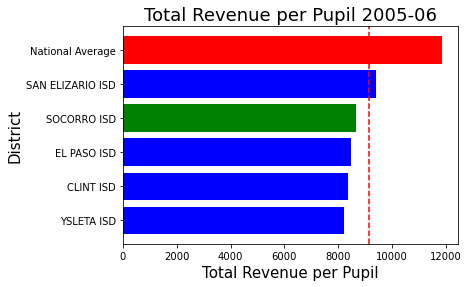

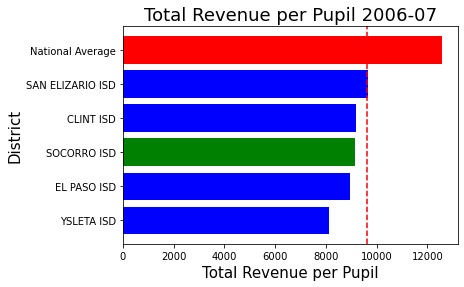

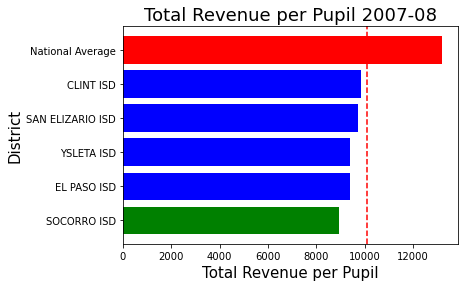

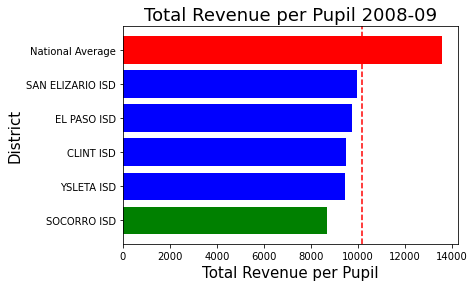

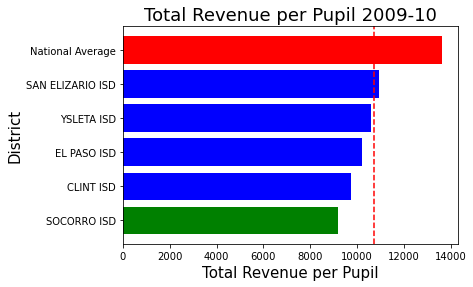

KeyError: 'Total Expenditures per Pupil 2005-06'

In [31]:
#district_measure= ['Averaged Freshman Graduation Rate', 'Total Dropout Rate - 9-12th grade','Total Revenue per Pupil','Total Expenditures per Pupil'] 
for district_measure in ['Total Revenue per Pupil','Total Expenditures per Pupil','Averaged Freshman Graduation Rate', 'Total Dropout Rate - 9-12th grade']:
  for year_range in ['2005-06','2006-07','2007-08','2008-09','2009-10']:
    school_plot(year_range, district_measure)

In [32]:
y_days= [170, 225, 200, 190]

In [33]:
x_days = ['US (School System Rating-13)', 'Japan(School System Rating-2)', 'Denmark(School System Rating-3)', 'Germany(School System Rating-7)']

Text(0.5, 1.0, 'Schooling Across Countries')

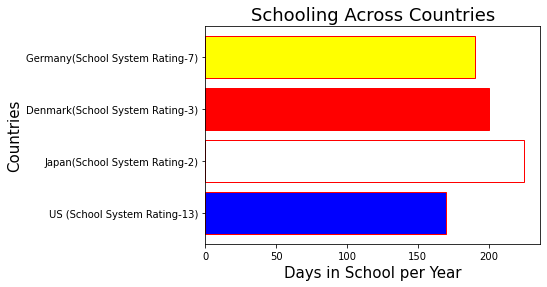

In [34]:
plt.barh(x_days, y_days, color=['blue', 'white', 'red', 'yellow'], edgecolor=['red','red', 'red', 'red'])
plt.ylabel('Countries', size=15)
plt.xlabel('Days in School per Year', size=15)
plt.title('Schooling Across Countries', size=18)